<a href="https://colab.research.google.com/github/lucasfreire01/Cancer_pele/blob/main/Cancer_pele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cloudpathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install pyvips

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.6/633.6 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyvips: filename=pyvips-2.2.1-py2.py3-none-any.whl size=54194 sha256=e30310faf8d37397c44e5e22dbceab0f477cee0269471d41b03176e4ed3fd8d0
  Stored in directory: /root/.cache/pip/wheels/cf/b8/f5/25f3202da9460cc789c5d232653d384474b3d10d829fa7002a
Successfully built pyvips


In [ ]:
!apt list libvips

Listing... Done


In [ ]:
!apt install libvips

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libvips42' instead of 'libvips'
The following additional packages will be installed:
  firefox fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  gsfonts imagemagick-6-common libdbus-glib-1-2 libdbusmenu-glib4
  libdbusmenu-gtk3-4 libgail-common libgail18 libgs9 libgs9-common
  libgsf-1-114 libgsf-1-common libgsl23 libgslcblas0 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libidn11 libijs-0.35 libimagequant0 libjbig2dec0 liblqr-1-0
  libmagickcore-6.q16-6 libmatio9 libopenslide0 libpoppler-glib8 libxtst6 nip2
  poppler-data xul-ext-ubufox
Suggested packages:
  fonts-lyx fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html gvfs
  libmagickcore-6.q16-6-extra libvips-doc libvips-tools poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-i

In [ ]:
!pip install fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from cloudpathlib import S3Path
import matplotlib.pyplot as plt
import pyvips
from PIL import Image

In [ ]:
Image.MAX_IMAGE_PIXELS = None

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Cancer_pele/train_metadata_pPa7YD3.csv', index_col="filename")
train

,age,sex,body_site,melanoma_history,breslow,ulceration,resolution,tif_cksum,tif_size,us_tif_url,eu_tif_url,as_tif_url
filename,,,,,,,,,,,,
1u4lhlqb.tif,[32:34[,2,thigh,YES,<0.8,NO,0.264384,3028450373,747151312,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
rqumqnfp.tif,[46:48[,1,trunc,NO,[1 : 2[,NO,0.264384,1294832049,591027450,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
bu5xt1xm.tif,[64:66[,2,face,NO,<0.8,NO,0.264384,774102360,465947458,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
dibvu7wk.tif,[62:64[,2,forearm,NaN,[2 : 4[,YES,0.226490,515827065,568174704,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
qsza4coh.tif,[90:92[,2,face,NO,[1 : 2[,NO,0.226490,1541795099,1042691978,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
...,...,...,...,...,...,...,...,...,...,...,...,...
n7jd638y.tif,[68:70[,1,head/neck,NaN,[1 : 2[,NO,0.250000,1949851255,136729436,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
8wg601oe.tif,[66:68[,1,head/neck,NaN,<0.8,NaN,0.250000,1344207528,1603484314,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
1ejfd01b.tif,[80:82[,1,trunk,NaN,>=4,YES,0.250000,4292211076,1423564688,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...


In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/Cancer_pele/train_labels.csv', index_col="filename")
train_labels

,relapse
filename,
1u4lhlqb.tif,0
rqumqnfp.tif,0
bu5xt1xm.tif,0
dibvu7wk.tif,0
qsza4coh.tif,0
...,...
n7jd638y.tif,0
8wg601oe.tif,0
1ejfd01b.tif,0


In [ ]:
train_labels.relapse.value_counts(dropna=False)

0    1129
1     213
Name: relapse, dtype: int64

In [ ]:
SEED = 42
NUM_IMAGES = 3
selected_image_paths = train.sample(
    random_state=SEED, n=NUM_IMAGES
).us_tif_url.values

In [ ]:
def visualize_page(page_num, image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 10))
    fig.tight_layout()

    for n, image_s3_path in enumerate(image_paths):
        fname = S3Path(image_s3_path).name
        print(f"Downloading {fname}")
        local_file = S3Path(image_s3_path).fspath

        n_frames = Image.open(local_file).n_frames
        img = pyvips.Image.new_from_file(local_file, page=page_num).numpy()

        axes[n].set_title(f"{fname}, page={page_num}\n {img.shape}\n")
        axes[n].imshow(img)

NoCredentialsError: ignored

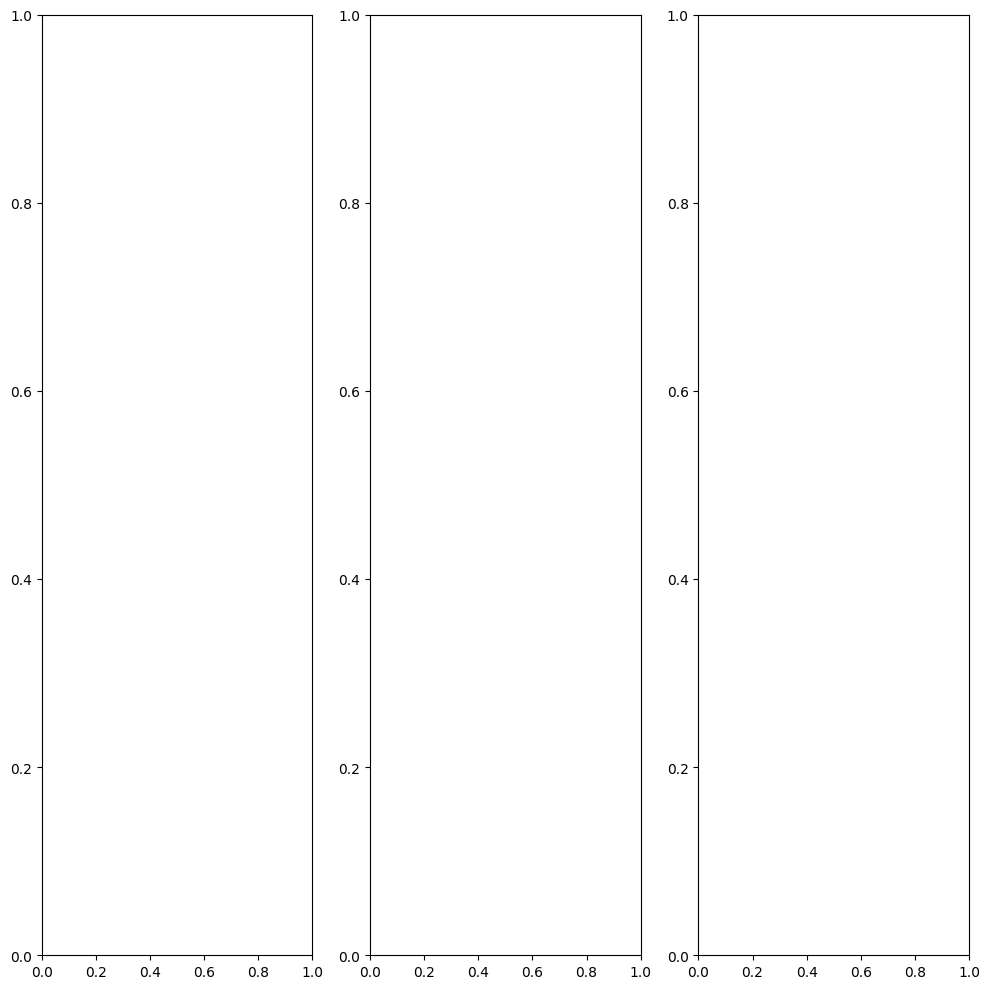

In [ ]:
visualize_page(3, selected_image_paths)

In [ ]:
select_image